# Feature Engineering and Model Comparison for Titanic Survival Prediction

## Project Goal

The goal of this Titanic survival prediction project is to build a machine learning model that can predict whether a passenger survived the Titanic disaster based on their characteristics (such as age, gender, class, fare, etc.). This is a classic binary classification problem where we aim to learn patterns from historical passenger data to determine survival outcomes.

## Why Logistic Regression and Random Forest?

**Logistic Regression** is chosen because:
- It's well-suited for binary classification problems (survived/did not survive)
- Provides interpretable results with coefficients that show the importance and direction of each feature
- Offers probability estimates for survival predictions
- Fast to train and works well with smaller datasets
- Serves as a strong baseline model for comparison

**Random Forest** is used because:
- It can capture complex, non-linear relationships between features that logistic regression might miss
- Handles interactions between features automatically (e.g., the combined effect of class and gender)
- More robust to outliers and missing values
- Provides feature importance rankings to understand which factors most influence survival
- Often achieves better predictive performance on this type of problem while still being interpretable

By comparing both models, we can balance interpretability (Logistic Regression) with predictive power (Random Forest) to gain comprehensive insights into what factors determined survival on the Titanic.



## Installing Libraries

In [ ]:
pip install pandas numpy matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Load and check data

In [4]:
# Load the dataset
df = pd.read_csv('Data/titanic.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Dataset shape: (891, 12)
Number of rows: 891
Number of columns: 12


In [5]:
# Display the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Display dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Display descriptive statistics
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})

# Only show columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("Missing Values Summary:")
print("=" * 50)
if len(missing_df) > 0:
    print(missing_df)
    print(f"\nTotal columns with missing values: {len(missing_df)}")
else:
    print("No missing values found in the dataset!")


Missing Values Summary:
          Missing Count  Missing Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467

Total columns with missing values: 3


In [11]:
# Data Cleaning
print("Before cleaning:")
print(f"Dataset shape: {df.shape}")
print(f"Missing values - Age: {df['Age'].isnull().sum()}, Embarked: {df['Embarked'].isnull().sum()}")


# Drop rows with missing values in Age and Embarked columns
df = df.dropna(subset=['Age', 'Embarked'])

# Keep only the specified columns
columns_to_keep = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[columns_to_keep]

print("\nAfter cleaning:")
print(f"Dataset shape: {df.shape}")
print(f"Missing values - Age: {df['Age'].isnull().sum()}, Embarked: {df['Embarked'].isnull().sum()}")
print(f"\nRemaining columns: {list(df.columns)}")


Before cleaning:
Dataset shape: (712, 11)
Missing values - Age: 0, Embarked: 0

After cleaning:
Dataset shape: (712, 8)
Missing values - Age: 0, Embarked: 0

Remaining columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [ ]:
pip install scikit-learn

## Preprocessing

In [15]:
# Preprocessing: One-hot encoding and normalization
from sklearn.preprocessing import MinMaxScaler

print("Before preprocessing:")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nSex unique values: {df['Sex'].unique()}")
print(f"Embarked unique values: {df['Embarked'].unique()}")

# Apply one-hot encoding to 'Sex' and 'Embarked' columns
sex_encoded = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=False)
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=False)

# Drop original columns and add encoded ones
df = df.drop(columns=['Sex', 'Embarked'])
df = pd.concat([df, sex_encoded, embarked_encoded], axis=1)

# Normalize 'Age' and 'Fare' columns to [0, 1]
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print("\nAfter preprocessing:")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nAge range: [{df['Age'].min():.4f}, {df['Age'].max():.4f}]")
print(f"Fare range: [{df['Fare'].min():.4f}, {df['Fare'].max():.4f}]")

Before preprocessing:
Dataset shape: (712, 8)
Columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

Sex unique values: ['male' 'female']
Embarked unique values: ['S' 'C' 'Q']

After preprocessing:
Dataset shape: (712, 11)
Columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

Age range: [0.0000, 1.0000]
Fare range: [0.0000, 1.0000]


## Feature Engineering

In [18]:
# Feature Engineering: Create new features
print("Before feature engineering:")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Create FamilySize feature (SibSp + Parch + 1)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone feature (1 if FamilySize == 1, else 0)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Create FarePerPerson feature (Fare / FamilySize)
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

print("\nAfter feature engineering:")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nNew features summary:")
print(f"FamilySize - Min: {df['FamilySize'].min()}, Max: {df['FamilySize'].max()}, Mean: {df['FamilySize'].mean():.2f}")
print(f"IsAlone - Value counts:\n{df['IsAlone'].value_counts().sort_index()}")
print(f"FarePerPerson - Min: {df['FarePerPerson'].min():.4f}, Max: {df['FarePerPerson'].max():.4f}, Mean: {df['FarePerPerson'].mean():.4f}")


Before feature engineering:
Dataset shape: (712, 11)
Columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

After feature engineering:
Dataset shape: (712, 14)
Columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'FarePerPerson']

New features summary:
FamilySize - Min: 1, Max: 8, Mean: 1.95
IsAlone - Value counts:
IsAlone
0    310
1    402
Name: count, dtype: int64
FarePerPerson - Min: 0.0000, Max: 1.0000, Mean: 0.0405


## Normalization

In [20]:
# Normalize boolean columns to 0-1 numeric values
print("Before boolean normalization:")
print(f"Data types:\n{df.dtypes}")

# Find all boolean columns
boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()

if len(boolean_columns) > 0:
    print(f"\nBoolean columns found: {boolean_columns}")
    # Convert boolean columns to 0/1
    for col in boolean_columns:
        df[col] = df[col].astype(int)
    print(f"Converted {len(boolean_columns)} boolean column(s) to 0/1 numeric values")
else:
    print("\nNo boolean columns found. All columns are already numeric or object type.")

# Also ensure any columns that might have True/False values are converted
# Check for columns with only 0/1 or True/False values and ensure they're numeric
for col in df.columns:
    if df[col].dtype == 'object':
        unique_vals = df[col].unique()
        if set(unique_vals).issubset({True, False, 1, 0, 'True', 'False', '1', '0'}):
            df[col] = df[col].astype(int)

print("\nAfter boolean normalization:")
print(f"Data types:\n{df.dtypes}")


Before boolean normalization:
Data types:
Survived           int64
Pclass             int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Sex_female          bool
Sex_male            bool
Embarked_C          bool
Embarked_Q          bool
Embarked_S          bool
FamilySize         int64
IsAlone            int64
FarePerPerson    float64
dtype: object

Boolean columns found: ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
Converted 5 boolean column(s) to 0/1 numeric values

After boolean normalization:
Data types:
Survived           int64
Pclass             int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Sex_female         int64
Sex_male           int64
Embarked_C         int64
Embarked_Q         int64
Embarked_S         int64
FamilySize         int64
IsAlone            int64
FarePerPerson    float64
dtype: object


In [21]:
df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,FarePerPerson
0,0,3,0.271174,1,0,0.014151,0,1,0,0,1,2,0,0.007076
1,1,1,0.472229,1,0,0.139136,1,0,1,0,0,2,0,0.069568
2,1,3,0.321438,0,0,0.015469,1,0,0,0,1,1,1,0.015469
3,1,1,0.434531,1,0,0.103644,1,0,0,0,1,2,0,0.051822
4,0,3,0.434531,0,0,0.015713,0,1,0,0,1,1,1,0.015713


## Spliting Train/Test

In [22]:
# Split dataset into training and test sets (80/20) with stratification
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Dataset Split Summary:")
print("=" * 50)
print(f"Total dataset size: {len(df)}")
print(f"\nTraining set:")
print(f"  Size: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"  Survived: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.1f}%)")
print(f"  Not Survived: {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"\nTest set:")
print(f"  Size: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")
print(f"  Survived: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.1f}%)")
print(f"  Not Survived: {(y_test == 0).sum()} ({(y_test == 0).sum()/len(y_test)*100:.1f}%)")
print(f"\nFeatures shape - Training: {X_train.shape}, Test: {X_test.shape}")
print(f"Target shape - Training: {y_train.shape}, Test: {y_test.shape}")


Dataset Split Summary:
Total dataset size: 712

Training set:
  Size: 569 (79.9%)
  Survived: 230 (40.4%)
  Not Survived: 339 (59.6%)

Test set:
  Size: 143 (20.1%)
  Survived: 58 (40.6%)
  Not Survived: 85 (59.4%)

Features shape - Training: (569, 13), Test: (143, 13)
Target shape - Training: (569,), Test: (143,)


# Logistic Regression

Training Logistic Regression classifier...

Logistic Regression Evaluation Results

Accuracy: 0.8042 (80.42%)

Confusion Matrix:
[[71 14]
 [14 44]]

Confusion Matrix Visualization:


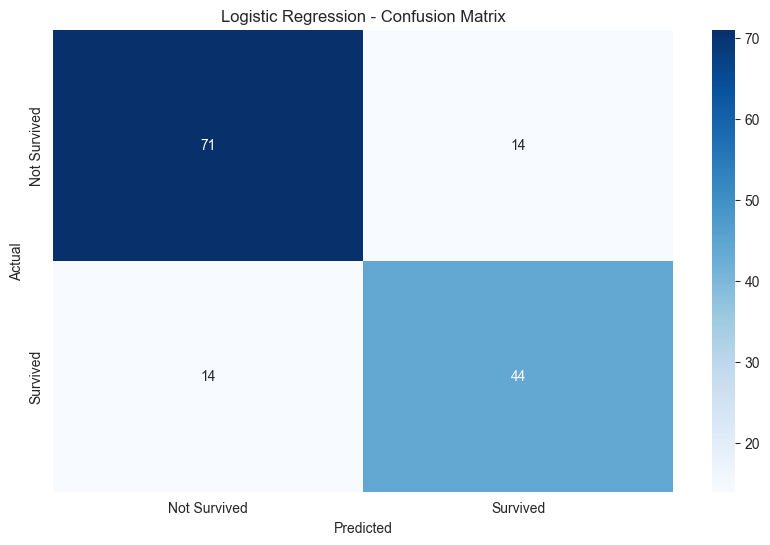


Classification Report:
              precision    recall  f1-score   support

Not Survived       0.84      0.84      0.84        85
    Survived       0.76      0.76      0.76        58

    accuracy                           0.80       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143


Brief Analysis:
- True Positives (Correctly predicted survived): 44
- True Negatives (Correctly predicted not survived): 71
- False Positives (Incorrectly predicted survived): 14
- False Negatives (Incorrectly predicted not survived): 14

The model achieves 80.42% accuracy, which indicates how well
it generalizes to unseen data. The confusion matrix shows the distribution
of correct and incorrect predictions for each class.


In [23]:
# Train Logistic Regression classifier and evaluate on test data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Initialize and train the Logistic Regression model
print("Training Logistic Regression classifier...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{'='*50}")
print(f"Logistic Regression Evaluation Results")
print(f"{'='*50}")
print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Confusion Matrix
print(f"\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nConfusion Matrix Visualization:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

# Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

# Brief comments on results
print(f"\n{'='*50}")
print("Brief Analysis:")
print(f"{'='*50}")
tn, fp, fn, tp = cm.ravel()
print(f"- True Positives (Correctly predicted survived): {tp}")
print(f"- True Negatives (Correctly predicted not survived): {tn}")
print(f"- False Positives (Incorrectly predicted survived): {fp}")
print(f"- False Negatives (Incorrectly predicted not survived): {fn}")
print(f"\nThe model achieves {accuracy*100:.2f}% accuracy, which indicates how well")
print(f"it generalizes to unseen data. The confusion matrix shows the distribution")
print(f"of correct and incorrect predictions for each class.")


# Random Forest

Training Random Forest classifier with hyperparameter tuning...
Performing grid search with 5-fold cross-validation...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8154

Random Forest Evaluation Results

Accuracy: 0.7972 (79.72%)
Precision: 0.7458
Recall: 0.7586
F1-Score: 0.7521

Confusion Matrix:
[[70 15]
 [14 44]]

Confusion Matrix Visualization:


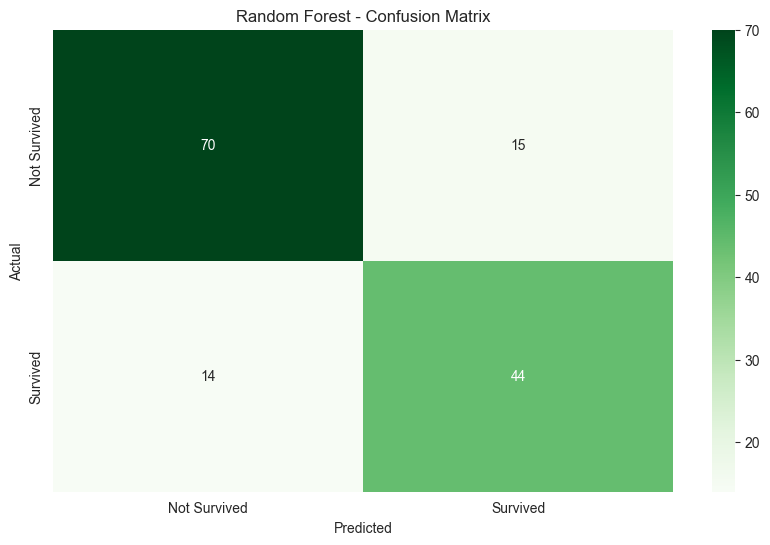


Classification Report:
              precision    recall  f1-score   support

Not Survived       0.83      0.82      0.83        85
    Survived       0.75      0.76      0.75        58

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143


Model Comparison: Random Forest vs Logistic Regression

   Metric  Logistic Regression  Random Forest  Difference
 Accuracy             0.804196       0.797203   -0.006993
Precision             0.758621       0.745763   -0.012858
   Recall             0.758621       0.758621    0.000000
 F1-Score             0.758621       0.752137   -0.006484

Brief Comparison Analysis:
✓ Logistic Regression achieves 80.42% accuracy vs Random Forest's 79.72%

- Random Forest shows similar or lower precision
- Random Forest shows similar or lower recall
- Random Forest shows similar or lower F1-score

Random Forest's ability to capture non-linear relationsh

In [24]:
# Train Random Forest classifier with hyperparameter tuning and evaluate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Training Random Forest classifier with hyperparameter tuning...")

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_base = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation (using 5-fold CV for faster tuning)
print("Performing grid search with 5-fold cross-validation...")
grid_search = GridSearchCV(
    rf_base, 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)
grid_search.fit(X_train, y_train)

# Get the best model
rf_model = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Make predictions on test data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print results
print(f"\n{'='*50}")
print(f"Random Forest Evaluation Results")
print(f"{'='*50}")
print(f"\nAccuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Confusion Matrix
print(f"\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print("\nConfusion Matrix Visualization:")
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Not Survived', 'Survived']))

# Compare with Logistic Regression
print(f"\n{'='*50}")
print("Model Comparison: Random Forest vs Logistic Regression")
print(f"{'='*50}")

# Get Logistic Regression metrics for comparison
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf]
})
comparison_df['Difference'] = comparison_df['Random Forest'] - comparison_df['Logistic Regression']

print("\n" + comparison_df.to_string(index=False))

print(f"\n{'='*50}")
print("Brief Comparison Analysis:")
print(f"{'='*50}")
if accuracy_rf > accuracy_lr:
    print(f"✓ Random Forest outperforms Logistic Regression with {accuracy_rf*100:.2f}% accuracy vs {accuracy_lr*100:.2f}%")
else:
    print(f"✓ Logistic Regression achieves {accuracy_lr*100:.2f}% accuracy vs Random Forest's {accuracy_rf*100:.2f}%")

print(f"\n- Random Forest shows {'better' if precision_rf > precision_lr else 'similar or lower'} precision")
print(f"- Random Forest shows {'better' if recall_rf > recall_lr else 'similar or lower'} recall")
print(f"- Random Forest shows {'better' if f1_rf > f1_lr else 'similar or lower'} F1-score")

print(f"\nRandom Forest's ability to capture non-linear relationships and feature interactions")
print(f"may provide advantages, while Logistic Regression offers better interpretability.")


## Conclusion

In this project, an end-to-end machine learning pipeline was implemented to predict passenger survival on the Titanic dataset. After data cleaning and careful feature engineering (such as FamilySize, IsAlone, and FarePerPerson), two models were trained and evaluated: Logistic Regression and Random Forest.

Logistic Regression achieved slightly better overall performance in terms of accuracy and F1-score, demonstrating that with well-engineered features, a simple and interpretable model can perform competitively. Random Forest, despite its ability to model non-linear relationships, did not provide a significant improvement on this dataset.

This comparison highlights the importance of data preprocessing and feature engineering over model complexity, and shows how baseline models can be strong and reliable choices in real-world machine learning workflows.